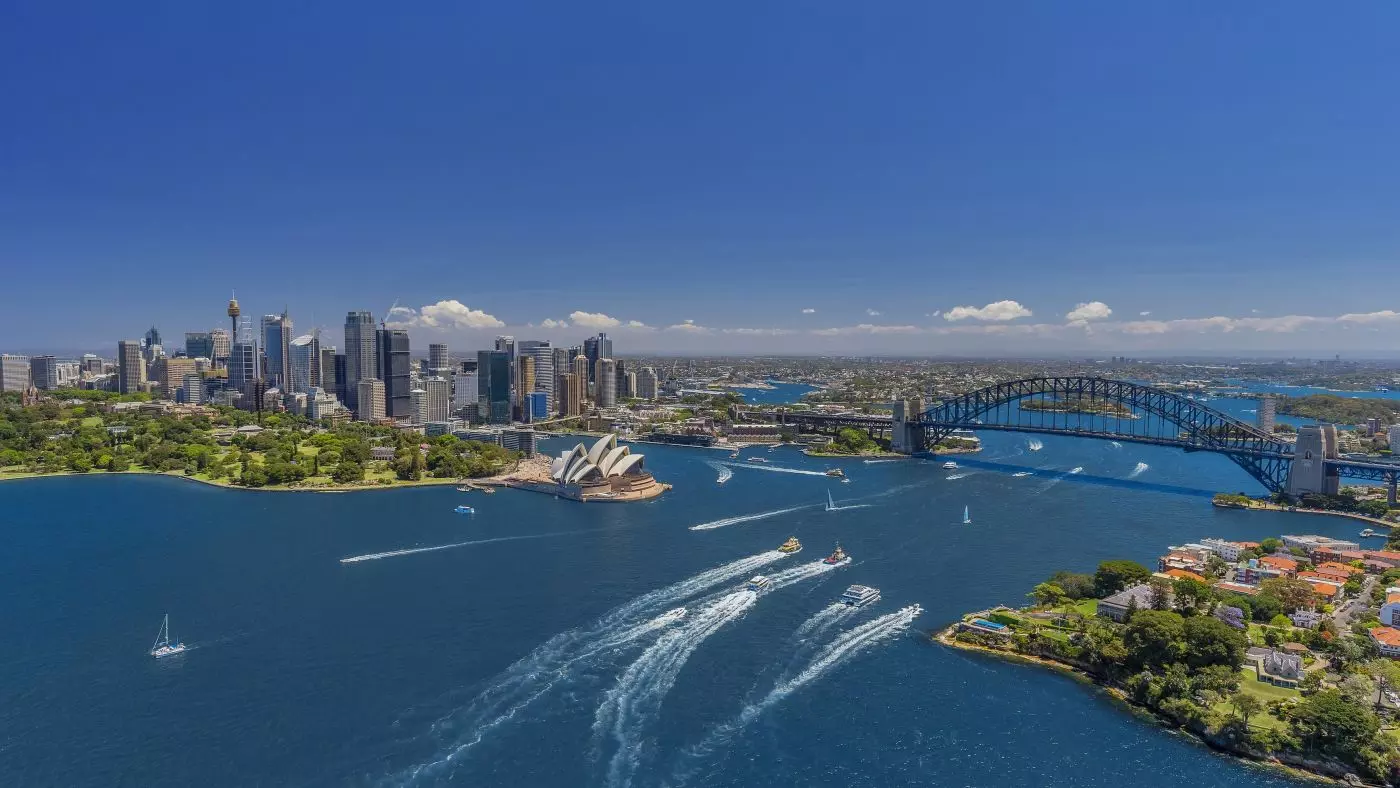

In [ ]:
from PIL import Image
import requests
url = 'https://www.sydney.com/sites/sydney/files/styles/landscape_1400x788/public/2019-10/165838.webp?itok=xr3WmadG'
im = Image.open(requests.get(url, stream=True).raw)
im

# Introduction

Property is a great investment because you make all the decisions and have direct control over the returns from your property. All investment comes with inherent risk. 
Although property is considered a more safe investment strategy than shares, for example, it still comes with the possibility you could lose your money.
Looking back at the previous trend could help people to come up with better decisions. Using the previous properties sales data, we could answer this questions:
Which suburbs has the most valuable properties in Sydney?

# Data

1. Sydney House Prices: https://www.kaggle.com/mihirhalai/sydney-house-prices
2. Suburbs in Sydney, Australia: https://www.kaggle.com/ssk27997/suburbs-in-sydney-australia

The Sydney House Prices dataset contains 200,000 Sydney property sales from 2000-2019 scarped from realestate.com.au

In [ ]:
import pandas as pd
import numpy as np

house_price = pd.read_csv('/content/drive/My Drive/datasets/Coursera/SydneyHousePrices.csv')
house_price.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


The Suburbs in Sydnet dataset contains names and locations of suburbs in Sydney

In [ ]:
postal_location = pd.read_csv('/content/drive/My Drive/datasets/Coursera/sydney_suburbs.csv')
postal_location.head()

,Suburb,Latitude,Longitude
0,Abbotsbury,-33.869285,150.866703
1,Abbotsford,-33.850553,151.129759
2,Acacia Gardens,-33.732459,150.912532
3,Agnes Banks,-33.614508,150.711448
4,Airds,-34.090000,150.826111


## Sydney Suburb

Using The Suburbs in Sydnet dataset, we can map the location of the suburbs in Sydney on the map.

In [ ]:
postal_location = postal_location.dropna()
postal_location = postal_location.reset_index(drop=True)

With geocoders module, we can see the geographical location of Sydney

In [ ]:
address = 'Sydney, Australia'

from geopy.geocoders import Nominatim

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Sydney are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of the City of Sydney are -33.8548157, 151.2164539.


Folium is a great tool to map point on the map. Looking at the distribution of the suburbs, it can be seen that the area around the river is more dense than the other area.

In [ ]:
import folium
# create map of Sydney using latitude and longitude values
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, suburb in zip(postal_location['Latitude'], postal_location['Longitude'], postal_location['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_sydney)  
    
map_sydney

## House Prices

Adding Latitude and Longitude columns to the house price dataset based on the Suburbs dataset, we can see the location of the propery that was sold on the map.

In [ ]:
df_combined = house_price
df_combined['Latitude'] = df_combined['suburb'].map(postal_location.set_index('Suburb')['Latitude'])
df_combined['Longitude'] = df_combined['suburb'].map(postal_location.set_index('Suburb')['Longitude'])

df_combined = df_combined.dropna()
df_combined = df_combined.reset_index(drop=True)

df_combined.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,Latitude,Longitude
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,-33.636504,151.329030
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,-33.636504,151.329030
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house,-33.609679,151.330945
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house,-33.636504,151.329030
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house,-33.609679,151.330945


In [ ]:
df_combined.describe()

,Id,postalCode,sellPrice,bed,bath,car,Latitude,Longitude
count,173708.000000,173708.000000,1.737080e+05,173708.000000,173708.000000,173708.000000,173708.000000,173708.000000
mean,98348.328597,2193.285001,1.301639e+06,3.580739,1.945103,1.922894,-33.853823,151.070130
std,57590.204030,183.450393,7.440795e+06,1.033467,0.893490,1.028606,0.108962,0.143789
min,1.000000,2000.000000,1.000000e+00,1.000000,1.000000,1.000000,-34.148333,150.640977
25%,47392.750000,2089.000000,7.300000e+05,3.000000,1.000000,1.000000,-33.935556,150.993923
50%,98421.500000,2146.000000,1.000000e+06,3.000000,2.000000,2.000000,-33.857500,151.088425
75%,148373.250000,2210.000000,1.500000e+06,4.000000,2.000000,2.000000,-33.772484,151.168611
max,199504.000000,4878.000000,2.147484e+09,99.000000,24.000000,30.000000,-33.457796,151.330945


# Methodology

In this project, we will map the suburbs based on the average property prices. Starting by mapping the suburbs, we can see the location of each suburbs. After that, we could combine the two dataset together to know the location of each properties sold. Finally, the average house prices in each suburb can be found by grouping the rows by the suburbs.

# Analysis

First, let's combine the two datasets and clean the combined dataset. Then, group it by suburbs and find the average house price. Finally, sort the rows by the average price.

In [ ]:
avg_price = df_combined.groupby('suburb').mean()

df_avg_prices = postal_location
df_avg_prices['Average_Price'] = df_avg_prices['Suburb'].map(avg_price['sellPrice'])
df_avg_prices = df_avg_prices.sort_values(by='Average_Price', ascending=False)
df_avg_prices = df_avg_prices.dropna()
df_avg_prices = df_avg_prices.reset_index(drop=True)
df_avg_prices

,Suburb,Latitude,Longitude,Average_Price
0,Point Piper,-33.867628,151.251573,1.101057e+07
1,Watsons Bay,-33.843274,151.282574,5.266579e+06
2,Darling Point,-33.873072,151.237638,5.259669e+06
3,Woolwich,-33.840199,151.171061,4.857000e+06
4,Bellevue Hill,-33.879712,151.256199,4.487961e+06
...,...,...,...,...
593,Blairmount,-34.048333,150.792778,4.798556e+05
594,Willmot,-33.724722,150.793889,4.726737e+05
595,Eschol Park,-34.031667,150.801111,4.699141e+05
596,Eagle Vale,-34.037778,150.811111,4.647986e+05


We can now map the suburbs on the map, with the color of each points representing the average price. 

In [ ]:
import branca
import branca.colormap as cm

def map_price(df_avg_prices):
  colormap = cm.LinearColormap(colors=['red', 'yellow', 'green'], index=[0, len(df_avg_prices)/2, len(df_avg_prices)], 
                              vmin=0, vmax=len(df_avg_prices))

  import folium

  # create map of Sydney using latitude and longitude values
  map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

  # add markers to map
  for lat, lng, suburb, price, idx in zip(df_avg_prices['Latitude'], df_avg_prices['Longitude'], df_avg_prices['Suburb'], df_avg_prices['Average_Price'], df_avg_prices.index):
      label = 'Suburb: {} \n Price: {} \n Rank: {}/{}'.format(suburb, price, idx+1, len(df_avg_prices))
      label = folium.Popup(label, parse_html=True)
      folium.CircleMarker(
          [lat, lng],
          radius=3,
          popup=label,
          color=colormap(idx),
          fill=True,
          parse_html=False).add_to(map_sydney)  
      
  return map_sydney

In [ ]:
map_price(df_avg_prices)

# Results & Discussion

As shown in the map above, expensive houses are generally located near the river and the shore of Sydney, while the cheaper houses are located at the western part of Sydney away from the water and the CBD.